<a href="https://colab.research.google.com/github/thebughuntress/ml/blob/main/predict_house_prices_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project**

**Resources**  
- [YouTube: Build Your First Machine Learning Model in Python](https://www.youtube.com/watch?v=29ZQ3TDGgRQ)  
- [Kaggle: The Boston Housing Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset?select=housing.csv)

**Model Types**  
- **Regression Model (used here):** Use when the target variable (`y`) is **quantitative** — i.e., it represents continuous numerical values.  
- **Classification Model:** Use when the target variable (`y`) is **categorical** — i.e., it consists of discrete class labels.


# **Load data**

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/BostonHousing_train.csv")
# Print a random sample of 5 rows from the DataFrame 'df'
print(df.sample(5))

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
400  0.08664  45.0   3.44     0  0.437  7.178  26.3  6.4798    5  398   
127  0.21161   0.0   8.56     0  0.520  6.137  87.4  2.7147    5  384   
74   0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
28   8.71675   0.0  18.10     0  0.693  6.471  98.8  1.7257   24  666   
152  0.32982   0.0  21.89     0  0.624  5.822  95.4  2.4699    4  437   

     ptratio       b  lstat  medv  
400     15.2  390.49   2.87  36.4  
127     20.9  394.47  13.44  19.3  
74      19.2  395.77  15.10  17.5  
28      20.2  391.98  17.12  13.1  
152     21.2  388.69  15.03  18.4  


# **Data preparation**

## **Data seperation into X and y**

In machine learning, data is typically divided into two main components: features (X) and target variable (y).

- X: Contains the features (inputs), typically the independent variables used for making predictions.
- y: Contains the target variable (output), which is the value we want the model to predict.

In [2]:
# Extract the target variable (median value of owner-occupied homes) as 'y'
y = df['medv']

# Extract all the features (independent variables) by dropping 'medv' from the DataFrame
# axis=1 indicates we're dropping a column (not a row)
X = df.drop('medv', axis=1)

# Print the target variable 'y' (the values we are trying to predict)
print(y.sample(5))

# Print the feature variables 'X' (the inputs used to make predictions)
print(X.sample(5))

219    17.8
160    21.5
148    17.9
86     50.0
333    19.9
Name: medv, dtype: float64
         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
282   0.17331   0.0   9.69     0  0.585  5.707   54.0  2.3817    6  391   
85    0.01501  80.0   2.01     0  0.435  6.635   29.7  8.3440    4  280   
351   1.38799   0.0   8.14     0  0.538  5.950   82.0  3.9900    4  307   
347   1.49632   0.0  19.58     0  0.871  5.404  100.0  1.5916    5  403   
242  88.97620   0.0  18.10     0  0.671  6.968   91.9  1.4165   24  666   

     ptratio       b  lstat  
282     19.2  396.90  12.01  
85      17.0  390.94   5.99  
351     21.0  232.60  27.71  
347     14.7  341.60  13.28  
242     20.2  396.90  17.21  


## **Data splitting**

Split the dataset using an **80/20 ratio**:  
- 80% for training the model  
- 20% for testing and evaluating its performance


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

# **Building the Model**

## **Linear Regression**

Linear Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and tries to fit a straight line (or hyperplane in higher dimensions) that minimizes the difference between the actual and predicted values. It's commonly used for predicting continuous outcomes, such as prices, temperatures, or sales volumes. The goal is to find the line that best represents the data by minimizing the Mean Squared Error (MSE).


### **Training the model**

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [5]:
# Make a prediction with lr model based on training set
y_lr_train_pred = lr.predict(X_train)

# Make a prediction with lr model based on testing set
y_lr_test_pred = lr.predict(X_test)

### **Model Performance**

Evaluate the model by comparing the actual values (from the dataset) with the predicted values (generated by the model).

**Performance Metrics**

- **Mean Squared Error (MSE):** Measures the average of the squared differences between actual and predicted values. Lower values indicate better performance.
- **R² Score (Coefficient of Determination):** Indicates how well the model explains the variability of the target variable. A score closer to 1.0 means the model fits the data well.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the training set
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# Evaluate performance on the test set
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# Display results
print("Linear Regression Performance:")
print(f"Train MSE: {lr_train_mse:.4f}")
print(f"Train R² : {lr_train_r2:.4f}")
print(f"Test MSE : {lr_test_mse:.4f}")
print(f"Test R²  : {lr_test_r2:.4f}")


Linear Regression Performance:
Train MSE: 20.0388
Train R² : 0.7589
Test MSE : 17.3975
Test R²  : 0.8132


In [7]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns= ['Model', 'Training MSE', 'Training R²', 'Test MSE', 'Test R²']
lr_results

,Model,Training MSE,Training R²,Test MSE,Test R²
0,Linear Regression,20.038833,0.758924,17.39754,0.813245


## **Random Forest**

Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy. It builds a "forest" of decision trees, each trained on a random subset of the data, and makes predictions by averaging the results (regression) or taking a majority vote (classification). Random Forest is robust to overfitting, handles both numerical and categorical data well, and can model complex relationships, making it highly effective for a wide range of tasks. It's particularly useful when dealing with large datasets and can handle missing data more efficiently than other models.

### **Training the model**

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [9]:
# Make a prediction with rf model based on training set
y_rf_train_pred = rf.predict(X_train)

# Make a prediction with rf model based on testing set
y_rf_test_pred = rf.predict(X_test)

### **Model performance**

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the training set
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# Evaluate performance on the test set
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

# Display results
print("Random Forest Performance:")
print(f"Train MSE: {rf_train_mse:.4f}")
print(f"Train R² : {rf_train_r2:.4f}")
print(f"Test MSE : {rf_test_mse:.4f}")
print(f"Test R²  : {rf_test_r2:.4f}")

Random Forest Performance:
Train MSE: 15.4696
Train R² : 0.8139
Test MSE : 17.9901
Test R²  : 0.8069


In [11]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns= ['Model', 'Training MSE', 'Training R²', 'Test MSE', 'Test R²']
rf_results

,Model,Training MSE,Training R²,Test MSE,Test R²
0,Random Forest,15.469576,0.813894,17.990095,0.806884


# **Model Comparison**

**Training Performance:**

The Random Forest model performs better on the training set, with a lower Training MSE (15.47) and higher Training R² (0.81) compared to Linear Regression's Training MSE (20.04) and Training R² (0.76). This indicates that Random Forest captures the training data better.

**Test Performance:**

For the Test data, both models show similar Test R² scores (0.81). However, Linear Regression has a slightly better Test MSE (17.40) compared to Random Forest (17.99). This suggests that while both models perform similarly in explaining variance in the test data, Linear Regression may be slightly better at minimizing the error on unseen data.

In [12]:
df_models = pd.concat([rf_results, lr_results], axis=0)
df_models = df_models.reset_index(drop=True)
df_models

,Model,Training MSE,Training R²,Test MSE,Test R²
0,Random Forest,15.469576,0.813894,17.990095,0.806884
1,Linear Regression,20.038833,0.758924,17.39754,0.813245



# **Data visualization**

## Linear Regression

Text(0.5, 0, 'Actual Value')

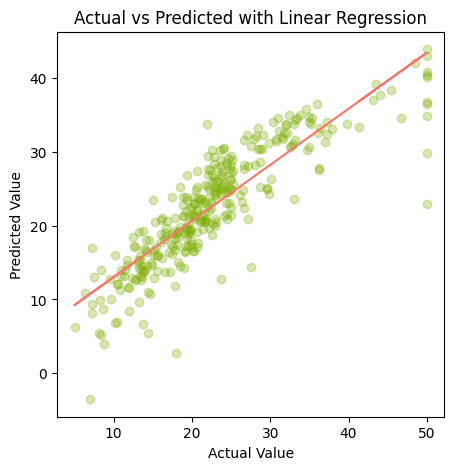

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

# Trendline
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.title('Actual vs Predicted with Linear Regression')
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')

<div style="page-break-before: always;"/>

## Random Forest

Text(0.5, 0, 'Actual Value')

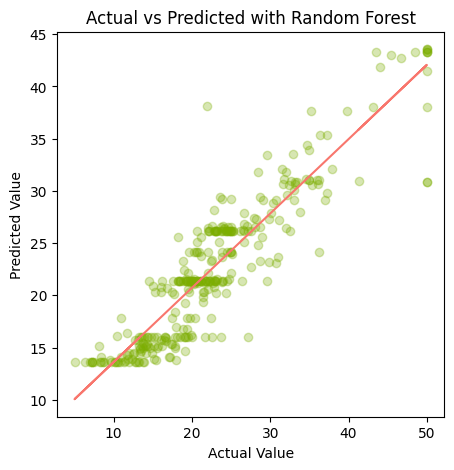

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred, c="#7CAE00", alpha=0.3)

# Trendline
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.title('Actual vs Predicted with Random Forest')
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')

<div style="page-break-before: always;"/>
    
# **Example of Predicting a Single Value**

In [15]:
# Define each feature as a variable

# Crime rate per capita
crim = 0.35809

# Proportion of residential land zoned for large properties
zn = 0.0

# Proportion of non-retail business acres per town
indus = 6.2

# Charles River dummy variable (1 if tract bounds river; 0 otherwise)
chas = 1

# Nitrogen oxide concentration (parts per 10 million)
nox = 0.507

# Average number of rooms per dwelling
rm = 6.951

# Proportion of owner-occupied units built before 1940
age = 88.5

# Weighted distance to employment centers
dis = 2.8617

# Index of accessibility to radial highways
rad = 8

# Property tax rate per $10,000
tax = 307

# Pupil-teacher ratio by town
ptratio = 17.4

# Proportion of Black residents (per 1000)
b = 391.7

# Lower status population percentage
lstat = 9.71

# Median value of owner-occupied homes (target variable)
medv = 26.7

# Define the feature names, which should match the columns of your training data
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# Example input data (one instance with the same feature structure as the training data)
X_new = np.array([[crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat]])

# Convert the input to a DataFrame with the correct column names
X_new_df = pd.DataFrame(X_new, columns=columns)

# Predict the target value using the trained models
y_pred_lr_single = lr.predict(X_new_df)
y_pred_rf_single = rf.predict(X_new_df)

# Output the predicted value
print("Actual value:", medv)
print("Predicted Value:", y_pred_lr_single[0])
print("Predicted Value:", y_pred_rf_single[0])

Actual value: 26.7
Predicted Value: 31.625911863684536
Predicted Value: 25.066612818487048
